# Import the librairies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers.experimental.preprocessing import Normalization
from sklearn.preprocessing import scale
from keras.layers import Dropout
from keras.regularizers import l1, l2, l1_l2
from keras.constraints import MaxNorm
from sklearn.model_selection import KFold

# Import the data

In [2]:
train_data = np.genfromtxt("phpYLeydd_train_5.csv", delimiter=',', dtype=None)
test_data = np.genfromtxt("phpYLeydd_test.csv", delimiter=',', dtype=None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


In [3]:
names=['Vvlh_x','Vvlhy','Vvlhz','Vvrhx','Vvrhy','Vvrhz','Vvlwx','Vvlwy','Vvlwz','Vvrwx','Vvrwy','Vvrwz','Valhx','Valhy','Valhz','Varhx','Varhy','Varhz','Valwx','Valwy','Valwz','Varwx','Varwy','Varwz','Svlh','Svrh','Svlw','Svrw','Svlh2','Svrh2','Svlw2','Svrw2','target']
train_data = pd.read_csv("phpYLeydd_train_5.csv", delimiter=',', names=names ,index_col=False)
test_data = pd.read_csv("phpYLeydd_test.csv", delimiter=',', names=names ,index_col=False)

In [4]:
train_data

,Vvlh_x,Vvlhy,Vvlhz,Vvrhx,Vvrhy,Vvrhz,Vvlwx,Vvlwy,Vvlwz,Vvrwx,Vvrwy,Vvrwz,Valhx,Valhy,Valhz,Varhx,Varhy,Varhz,Valwx,Valwy,Valwz,Varwx,Varwy,Varwz,Svlh,Svrh,Svlw,Svrw,Svlh2,Svrh2,Svlw2,Svrw2,target
0,-0.008698,-0.004076,-0.002762,0.002546,-0.000775,0.000470,-0.011735,-0.006037,-0.003555,0.002243,-0.000629,0.000400,-0.000254,-0.000411,-0.000146,-0.000847,0.000757,-5.713000e-05,-0.000053,-0.000513,-0.000136,-0.000943,8.413500e-04,-0.000053,0.009995,0.002703,0.013667,0.002363,0.000505,0.001137,0.000533,0.001265,'H'
1,0.010705,-0.005042,-0.000821,-0.032239,0.007675,0.000003,0.007935,-0.003284,-0.000503,-0.016884,0.001384,0.000210,0.001659,-0.001250,-0.000150,-0.004815,0.001459,-6.400000e-07,0.001260,-0.000852,-0.000106,-0.002365,5.555400e-04,0.000026,0.011861,0.033140,0.008602,0.016942,0.002083,0.005031,0.001525,0.002430,'S'
2,0.010225,-0.005102,-0.001765,0.000209,0.003688,0.000207,0.008022,-0.004018,-0.000957,0.000011,0.000282,-0.000003,0.002880,-0.001205,-0.000380,-0.000105,0.000172,4.255000e-05,0.001190,-0.000529,-0.000118,-0.000049,-1.500000e-07,0.000008,0.011562,0.003700,0.009022,0.000282,0.003145,0.000206,0.001308,0.000050,'P'
3,0.001322,0.002716,0.000919,0.002965,0.004803,-0.002245,-0.000537,0.002385,0.001186,0.002661,0.004261,-0.001465,0.000028,-0.000065,-0.000084,-0.001283,-0.001579,4.848200e-04,0.000126,-0.000261,-0.000186,-0.000878,-9.911600e-04,0.000332,0.003158,0.006075,0.002717,0.005233,0.000110,0.002091,0.000344,0.001365,'S'
4,-0.000958,-0.000173,-0.000050,-0.003966,-0.001001,-0.000135,-0.000689,-0.000122,0.000013,-0.002953,-0.000702,-0.000124,0.000003,0.000008,-0.000006,0.002634,-0.000133,2.454600e-04,0.000008,0.000009,-0.000005,-0.000674,-2.233200e-04,-0.000029,0.000974,0.004093,0.000699,0.003038,0.000010,0.002649,0.000013,0.000710,'D'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7864,0.000863,0.000147,-0.000103,-0.028183,-0.001854,-0.002864,0.000168,-0.000328,0.000223,-0.019225,-0.007321,-0.005099,-0.000143,-0.000195,0.000020,0.000374,0.002706,1.388500e-04,-0.000157,-0.000086,-0.000009,0.002974,2.737240e-03,-0.000251,0.000881,0.028388,0.000431,0.021195,0.000243,0.002736,0.000179,0.004050,'S'
7865,-0.004186,0.005957,0.001975,0.003555,0.007504,0.002729,-0.000520,0.004258,0.001102,0.001782,0.004892,0.000639,-0.001707,0.000496,0.000395,0.000924,0.000247,2.503600e-04,-0.000841,0.000008,0.000380,0.000223,-1.724400e-04,0.000122,0.007544,0.008741,0.004429,0.005246,0.001821,0.000989,0.000924,0.000307,'R'
7866,-0.000065,0.000032,-0.000029,0.000047,-0.000255,-0.000033,-0.000135,0.000012,-0.000016,0.000126,-0.000398,-0.000030,0.000005,0.000045,-0.000004,-0.003658,-0.001217,-1.341200e-04,-0.000004,0.000044,-0.000003,-0.005602,1.958000e-05,-0.000366,0.000078,0.000261,0.000137,0.000419,0.000045,0.003858,0.000045,0.005614,'D'
7867,-0.000133,-0.000296,0.000038,-0.000341,-0.000054,0.000042,-0.001049,0.001773,-0.000022,0.002901,0.002312,-0.001474,-0.000033,0.000040,-0.000004,-0.000027,0.000009,3.050000e-06,-0.000195,0.000801,-0.000026,0.001375,7.963600e-04,-0.000387,0.000327,0.000348,0.002060,0.003992,0.000052,0.000029,0.000825,0.001635,'D'


In [5]:
test_data

,Vvlh_x,Vvlhy,Vvlhz,Vvrhx,Vvrhy,Vvrhz,Vvlwx,Vvlwy,Vvlwz,Vvrwx,Vvrwy,Vvrwz,Valhx,Valhy,Valhz,Varhx,Varhy,Varhz,Valwx,Valwy,Valwz,Varwx,Varwy,Varwz,Svlh,Svrh,Svlw,Svrw,Svlh2,Svrh2,Svlw2,Svrw2,target
0,-0.024427,0.006105,-0.009190,0.009911,0.003952,0.022503,-0.020666,0.008078,-0.006453,0.009038,-0.001229,0.028208,-0.001282,0.000572,0.003312,0.002689,0.000078,-0.005778,-0.000221,-0.001157,-0.005485,0.002440,-0.001371,-0.004229,0.026803,0.024904,0.023108,0.029646,0.003597,0.006373,0.005610,0.005071,'S'
1,-0.004975,0.037317,-0.000169,-0.008475,-0.018003,0.000343,-0.000847,0.029391,-0.000093,-0.005268,-0.011992,0.000034,0.000259,0.000682,0.000015,0.000678,-0.000060,-0.000140,0.000135,-0.001107,-0.000180,0.000533,0.000013,-0.000122,0.037648,0.019901,0.029403,0.013098,0.000730,0.000695,0.001130,0.000547,'S'
2,0.004199,-0.004871,0.007259,0.004396,-0.007048,0.008402,0.006191,-0.010978,0.007110,0.003973,-0.004095,0.009278,0.002711,-0.008731,0.000301,0.001810,0.002298,0.000578,-0.000035,-0.003562,0.000198,0.000803,-0.003253,0.000269,0.009698,0.011815,0.014471,0.010892,0.009148,0.002981,0.003567,0.003362,'S'
3,-0.000579,-0.004085,0.000015,-0.011690,-0.000814,-0.001949,0.000248,0.001156,0.000126,-0.011016,-0.000596,-0.002330,-0.000068,-0.000074,0.000035,0.000657,-0.000049,-0.000047,0.000010,-0.000115,0.000041,0.000409,0.000451,0.000103,0.004126,0.011879,0.001189,0.011276,0.000106,0.000660,0.000123,0.000617,'S'
4,-0.002929,-0.001741,-0.000287,0.004772,-0.012481,0.002615,-0.006595,-0.002301,0.000360,-0.001412,-0.010184,0.000158,0.000141,0.000062,0.000055,-0.000921,-0.000623,-0.000157,0.000424,0.000467,-0.000145,-0.000848,-0.002033,-0.000161,0.003420,0.013616,0.006994,0.010282,0.000164,0.001123,0.000647,0.002208,'P'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,0.000444,-0.000855,-0.000432,0.003102,-0.000173,0.000014,0.000028,0.000745,-0.000316,-0.000027,-0.000368,-0.000281,0.000145,0.000100,-0.000019,0.000188,-0.000209,0.000034,0.000107,0.000086,-0.000026,0.000142,0.000225,0.000004,0.001056,0.003107,0.000809,0.000464,0.000177,0.000283,0.000140,0.000266,'D'
2000,0.005760,-0.006641,-0.002260,-0.002855,-0.008738,-0.002295,0.002331,-0.006528,-0.001527,-0.000823,-0.006350,-0.001135,0.000166,0.000953,0.000013,-0.000202,0.000568,0.000026,0.000309,0.000470,-0.000054,-0.000189,0.000115,-0.000075,0.009077,0.009474,0.007098,0.006503,0.000968,0.000604,0.000565,0.000234,'R'
2001,0.000167,-0.025493,-0.000543,0.003275,0.001768,-0.000491,0.000414,-0.020334,0.000153,0.002887,0.000980,-0.000508,-0.000397,0.000104,-0.000232,0.000032,0.000477,-0.000055,-0.000491,0.000548,-0.000244,0.000093,0.000267,-0.000038,0.025500,0.003754,0.020339,0.003090,0.000472,0.000481,0.000775,0.000285,'P'
2002,-0.001842,-0.004095,0.000595,-0.025661,0.003843,0.000059,-0.001862,-0.004079,0.000603,-0.023326,0.006599,0.001116,-0.004344,-0.006896,0.001046,0.000403,-0.000012,0.000046,-0.003936,-0.006373,0.000954,0.000338,0.000817,0.000142,0.004530,0.025947,0.004524,0.024267,0.008217,0.000405,0.007551,0.000896,'S'


In [6]:
trainX, trainy = train_data.iloc[:, :-1], train_data.iloc[:, -1]
testX, testy = test_data.iloc[:, :-1], test_data.iloc[: , -1]

In [7]:
trainX

,Vvlh_x,Vvlhy,Vvlhz,Vvrhx,Vvrhy,Vvrhz,Vvlwx,Vvlwy,Vvlwz,Vvrwx,Vvrwy,Vvrwz,Valhx,Valhy,Valhz,Varhx,Varhy,Varhz,Valwx,Valwy,Valwz,Varwx,Varwy,Varwz,Svlh,Svrh,Svlw,Svrw,Svlh2,Svrh2,Svlw2,Svrw2
0,-0.008698,-0.004076,-0.002762,0.002546,-0.000775,0.000470,-0.011735,-0.006037,-0.003555,0.002243,-0.000629,0.000400,-0.000254,-0.000411,-0.000146,-0.000847,0.000757,-5.713000e-05,-0.000053,-0.000513,-0.000136,-0.000943,8.413500e-04,-0.000053,0.009995,0.002703,0.013667,0.002363,0.000505,0.001137,0.000533,0.001265
1,0.010705,-0.005042,-0.000821,-0.032239,0.007675,0.000003,0.007935,-0.003284,-0.000503,-0.016884,0.001384,0.000210,0.001659,-0.001250,-0.000150,-0.004815,0.001459,-6.400000e-07,0.001260,-0.000852,-0.000106,-0.002365,5.555400e-04,0.000026,0.011861,0.033140,0.008602,0.016942,0.002083,0.005031,0.001525,0.002430
2,0.010225,-0.005102,-0.001765,0.000209,0.003688,0.000207,0.008022,-0.004018,-0.000957,0.000011,0.000282,-0.000003,0.002880,-0.001205,-0.000380,-0.000105,0.000172,4.255000e-05,0.001190,-0.000529,-0.000118,-0.000049,-1.500000e-07,0.000008,0.011562,0.003700,0.009022,0.000282,0.003145,0.000206,0.001308,0.000050
3,0.001322,0.002716,0.000919,0.002965,0.004803,-0.002245,-0.000537,0.002385,0.001186,0.002661,0.004261,-0.001465,0.000028,-0.000065,-0.000084,-0.001283,-0.001579,4.848200e-04,0.000126,-0.000261,-0.000186,-0.000878,-9.911600e-04,0.000332,0.003158,0.006075,0.002717,0.005233,0.000110,0.002091,0.000344,0.001365
4,-0.000958,-0.000173,-0.000050,-0.003966,-0.001001,-0.000135,-0.000689,-0.000122,0.000013,-0.002953,-0.000702,-0.000124,0.000003,0.000008,-0.000006,0.002634,-0.000133,2.454600e-04,0.000008,0.000009,-0.000005,-0.000674,-2.233200e-04,-0.000029,0.000974,0.004093,0.000699,0.003038,0.000010,0.002649,0.000013,0.000710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7864,0.000863,0.000147,-0.000103,-0.028183,-0.001854,-0.002864,0.000168,-0.000328,0.000223,-0.019225,-0.007321,-0.005099,-0.000143,-0.000195,0.000020,0.000374,0.002706,1.388500e-04,-0.000157,-0.000086,-0.000009,0.002974,2.737240e-03,-0.000251,0.000881,0.028388,0.000431,0.021195,0.000243,0.002736,0.000179,0.004050
7865,-0.004186,0.005957,0.001975,0.003555,0.007504,0.002729,-0.000520,0.004258,0.001102,0.001782,0.004892,0.000639,-0.001707,0.000496,0.000395,0.000924,0.000247,2.503600e-04,-0.000841,0.000008,0.000380,0.000223,-1.724400e-04,0.000122,0.007544,0.008741,0.004429,0.005246,0.001821,0.000989,0.000924,0.000307
7866,-0.000065,0.000032,-0.000029,0.000047,-0.000255,-0.000033,-0.000135,0.000012,-0.000016,0.000126,-0.000398,-0.000030,0.000005,0.000045,-0.000004,-0.003658,-0.001217,-1.341200e-04,-0.000004,0.000044,-0.000003,-0.005602,1.958000e-05,-0.000366,0.000078,0.000261,0.000137,0.000419,0.000045,0.003858,0.000045,0.005614
7867,-0.000133,-0.000296,0.000038,-0.000341,-0.000054,0.000042,-0.001049,0.001773,-0.000022,0.002901,0.002312,-0.001474,-0.000033,0.000040,-0.000004,-0.000027,0.000009,3.050000e-06,-0.000195,0.000801,-0.000026,0.001375,7.963600e-04,-0.000387,0.000327,0.000348,0.002060,0.003992,0.000052,0.000029,0.000825,0.001635


In [8]:
trainy

0       'H'
1       'S'
2       'P'
3       'S'
4       'D'
       ... 
7864    'S'
7865    'R'
7866    'D'
7867    'D'
7868    'D'
Name: target, Length: 7869, dtype: object

In [9]:
testX

,Vvlh_x,Vvlhy,Vvlhz,Vvrhx,Vvrhy,Vvrhz,Vvlwx,Vvlwy,Vvlwz,Vvrwx,Vvrwy,Vvrwz,Valhx,Valhy,Valhz,Varhx,Varhy,Varhz,Valwx,Valwy,Valwz,Varwx,Varwy,Varwz,Svlh,Svrh,Svlw,Svrw,Svlh2,Svrh2,Svlw2,Svrw2
0,-0.024427,0.006105,-0.009190,0.009911,0.003952,0.022503,-0.020666,0.008078,-0.006453,0.009038,-0.001229,0.028208,-0.001282,0.000572,0.003312,0.002689,0.000078,-0.005778,-0.000221,-0.001157,-0.005485,0.002440,-0.001371,-0.004229,0.026803,0.024904,0.023108,0.029646,0.003597,0.006373,0.005610,0.005071
1,-0.004975,0.037317,-0.000169,-0.008475,-0.018003,0.000343,-0.000847,0.029391,-0.000093,-0.005268,-0.011992,0.000034,0.000259,0.000682,0.000015,0.000678,-0.000060,-0.000140,0.000135,-0.001107,-0.000180,0.000533,0.000013,-0.000122,0.037648,0.019901,0.029403,0.013098,0.000730,0.000695,0.001130,0.000547
2,0.004199,-0.004871,0.007259,0.004396,-0.007048,0.008402,0.006191,-0.010978,0.007110,0.003973,-0.004095,0.009278,0.002711,-0.008731,0.000301,0.001810,0.002298,0.000578,-0.000035,-0.003562,0.000198,0.000803,-0.003253,0.000269,0.009698,0.011815,0.014471,0.010892,0.009148,0.002981,0.003567,0.003362
3,-0.000579,-0.004085,0.000015,-0.011690,-0.000814,-0.001949,0.000248,0.001156,0.000126,-0.011016,-0.000596,-0.002330,-0.000068,-0.000074,0.000035,0.000657,-0.000049,-0.000047,0.000010,-0.000115,0.000041,0.000409,0.000451,0.000103,0.004126,0.011879,0.001189,0.011276,0.000106,0.000660,0.000123,0.000617
4,-0.002929,-0.001741,-0.000287,0.004772,-0.012481,0.002615,-0.006595,-0.002301,0.000360,-0.001412,-0.010184,0.000158,0.000141,0.000062,0.000055,-0.000921,-0.000623,-0.000157,0.000424,0.000467,-0.000145,-0.000848,-0.002033,-0.000161,0.003420,0.013616,0.006994,0.010282,0.000164,0.001123,0.000647,0.002208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,0.000444,-0.000855,-0.000432,0.003102,-0.000173,0.000014,0.000028,0.000745,-0.000316,-0.000027,-0.000368,-0.000281,0.000145,0.000100,-0.000019,0.000188,-0.000209,0.000034,0.000107,0.000086,-0.000026,0.000142,0.000225,0.000004,0.001056,0.003107,0.000809,0.000464,0.000177,0.000283,0.000140,0.000266
2000,0.005760,-0.006641,-0.002260,-0.002855,-0.008738,-0.002295,0.002331,-0.006528,-0.001527,-0.000823,-0.006350,-0.001135,0.000166,0.000953,0.000013,-0.000202,0.000568,0.000026,0.000309,0.000470,-0.000054,-0.000189,0.000115,-0.000075,0.009077,0.009474,0.007098,0.006503,0.000968,0.000604,0.000565,0.000234
2001,0.000167,-0.025493,-0.000543,0.003275,0.001768,-0.000491,0.000414,-0.020334,0.000153,0.002887,0.000980,-0.000508,-0.000397,0.000104,-0.000232,0.000032,0.000477,-0.000055,-0.000491,0.000548,-0.000244,0.000093,0.000267,-0.000038,0.025500,0.003754,0.020339,0.003090,0.000472,0.000481,0.000775,0.000285
2002,-0.001842,-0.004095,0.000595,-0.025661,0.003843,0.000059,-0.001862,-0.004079,0.000603,-0.023326,0.006599,0.001116,-0.004344,-0.006896,0.001046,0.000403,-0.000012,0.000046,-0.003936,-0.006373,0.000954,0.000338,0.000817,0.000142,0.004530,0.025947,0.004524,0.024267,0.008217,0.000405,0.007551,0.000896


In [10]:
testy

0       'S'
1       'S'
2       'S'
3       'S'
4       'P'
       ... 
1999    'D'
2000    'R'
2001    'P'
2002    'S'
2003    'H'
Name: target, Length: 2004, dtype: object

# Plot the distribution of the values of the variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fa53af690>,
      dtype=object)

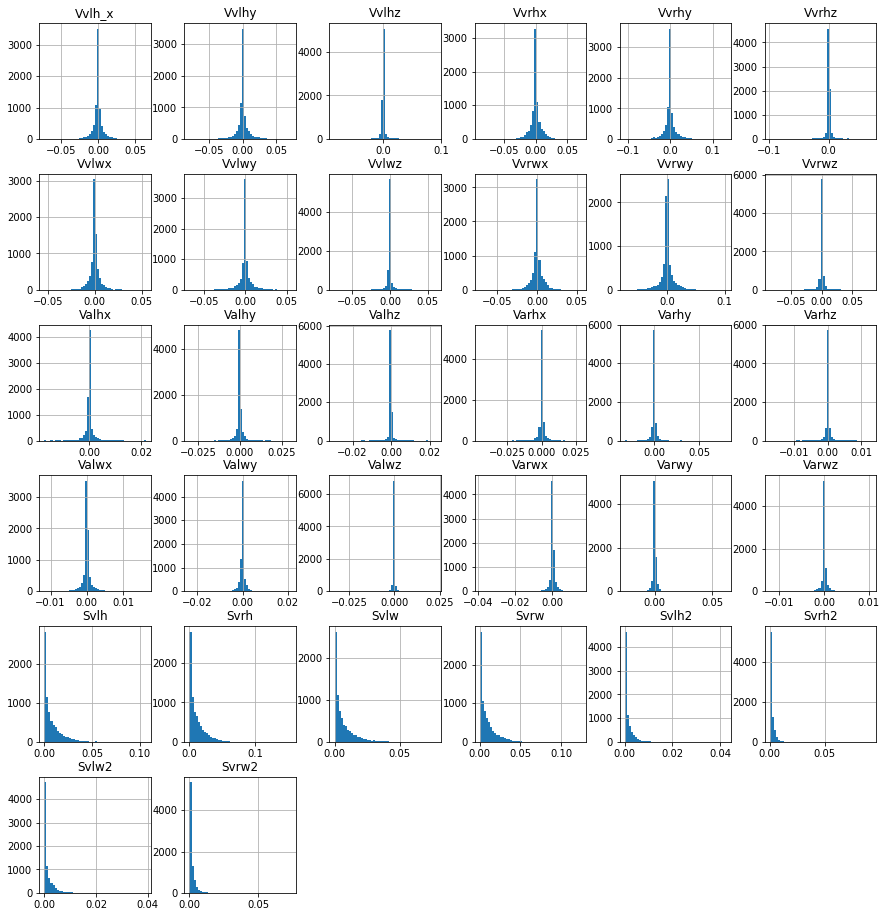

In [11]:
names2 = list(train_data.columns)
train_data[names].hist(bins=50, figsize = (15,16))

# Let's categorize the target values

In [12]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

trainy = np.array(trainy)

label_encoder = LabelEncoder()
trainy = label_encoder.fit_transform(trainy) # transforms the strings values from 0 to 4 (5 categ)

testy = np.array(testy)

label_encoder = LabelEncoder()
testy = label_encoder.fit_transform(testy)

In [14]:
print(testy[:20])
print(trainy[:20])

[4 4 4 4 2 4 2 4 0 2 4 1 1 4 0 4 0 4 4 4]
[1 4 2 4 0 2 3 0 4 2 2 4 2 0 2 4 0 4 3 0]


In [15]:
from keras.utils import to_categorical
trainy = to_categorical(trainy, num_classes=5) # and now we transform to categorical vectors
testy = to_categorical(testy, num_classes=5)

In [17]:
print(trainy)

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [18]:
print(testy)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]]


In [19]:
trainX = trainX.iloc[:,:].values #values in an array so that the model will recognize it
print(trainX)

[[-8.698340e-03 -4.076260e-03 -2.761570e-03 ...  1.137130e-03
   5.334100e-04  1.264530e-03]
 [ 1.070462e-02 -5.042330e-03 -8.208400e-04 ...  5.031290e-03
   1.524980e-03  2.429530e-03]
 [ 1.022454e-02 -5.102330e-03 -1.764920e-03 ...  2.055100e-04
   1.307700e-03  4.954000e-05]
 ...
 [-6.513000e-05  3.223000e-05 -2.883000e-05 ...  3.857800e-03
   4.460000e-05  5.614240e-03]
 [-1.332900e-04 -2.961200e-04  3.803000e-05 ...  2.891000e-05
   8.246900e-04  1.635090e-03]
 [ 5.424700e-04 -3.359100e-04  2.602000e-05 ...  8.636030e-03
   2.339700e-04  4.257580e-03]]


In [20]:
testX = testX.iloc[:,:].values
print(testX)

[[-0.02442655  0.00610543 -0.00918982 ...  0.0063732   0.00560961
   0.00507109]
 [-0.00497514  0.03731698 -0.00016922 ...  0.0006945   0.00112998
   0.0005467 ]
 [ 0.00419865 -0.00487124  0.00725939 ...  0.00298148  0.00356726
   0.00336183]
 ...
 [ 0.00016689 -0.02549327 -0.00054342 ...  0.00048123  0.00077494
   0.00028477]
 [-0.00184236 -0.00409535  0.00059549 ...  0.00040539  0.00755097
   0.00089556]
 [ 0.00591366  0.00526072 -0.00314228 ...  0.00098529  0.00117932
   0.00045704]]


In [21]:
X = np.concatenate((trainX, testX))

In [22]:
X

array([[-8.698340e-03, -4.076260e-03, -2.761570e-03, ...,  1.137130e-03,
         5.334100e-04,  1.264530e-03],
       [ 1.070462e-02, -5.042330e-03, -8.208400e-04, ...,  5.031290e-03,
         1.524980e-03,  2.429530e-03],
       [ 1.022454e-02, -5.102330e-03, -1.764920e-03, ...,  2.055100e-04,
         1.307700e-03,  4.954000e-05],
       ...,
       [ 1.668900e-04, -2.549327e-02, -5.434200e-04, ...,  4.812300e-04,
         7.749400e-04,  2.847700e-04],
       [-1.842360e-03, -4.095350e-03,  5.954900e-04, ...,  4.053900e-04,
         7.550970e-03,  8.955600e-04],
       [ 5.913660e-03,  5.260720e-03, -3.142280e-03, ...,  9.852900e-04,
         1.179320e-03,  4.570400e-04]])

# First model

We are going to use a 4 layers neural network (the last one being the output).

We dropout after every layer why ? => some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer. 

Dropout has the effect of making the training process noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for the inputs.

We are also always going to use l2 regularization because it is a process of introducing additional information in order to prevent overfitting. 

Taking 64 neurons on the layers is quite random, and having 3 of them is random too. But since we have many values i think it should be okay

In [29]:
normalizer = Normalization() # normalk
normalizer.adapt(X) # holds the mean and standard deviation of the features
model = Sequential([
    normalizer,
    Dense(64, activation='sigmoid'),
    Dropout(0.3),
    Dense(64, activation='sigmoid'),
    Dropout(0.3),
    Dense(64, activation='sigmoid'), # The softmax function is a more generalized logistic activation function which is used for multiclass classification.
    Dropout(0.3),
    Dense(5, activation='softmax', kernel_regularizer=l2(0.01)), #softmax: 5 classes and we want a proba 
])

In [30]:
model.compile(
    optimizer=Adam(0.01, amsgrad=True),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

In [31]:
history = model.fit(
    trainX,
    trainy,
    epochs=100,
    validation_data=(testX,testy)
)

Epoch 1/100
197/197 [==============================] - 4s 4ms/step - loss: 1.5796 - categorical_accuracy: 0.3563 - val_loss: 1.3362 - val_categorical_accuracy: 0.4549
Epoch 2/100
197/197 [==============================] - 1s 3ms/step - loss: 1.3113 - categorical_accuracy: 0.4657 - val_loss: 1.3151 - val_categorical_accuracy: 0.4492
Epoch 3/100
197/197 [==============================] - 1s 3ms/step - loss: 1.2848 - categorical_accuracy: 0.4865 - val_loss: 1.2986 - val_categorical_accuracy: 0.4473
Epoch 4/100
197/197 [==============================] - 1s 3ms/step - loss: 1.2748 - categorical_accuracy: 0.4808 - val_loss: 1.3014 - val_categorical_accuracy: 0.4714
Epoch 5/100
197/197 [==============================] - 1s 3ms/step - loss: 1.2565 - categorical_accuracy: 0.5028 - val_loss: 1.2840 - val_categorical_accuracy: 0.4816
Epoch 6/100
197/197 [==============================] - 1s 3ms/step - loss: 1.2562 - categorical_accuracy: 0.5009 - val_loss: 1.2808 - val_categorical_accuracy: 0.479

In [32]:
probs = model.predict(testX)
predicted_labels = [np.argmax(p) for p in probs]

In [33]:
evaluation = model.evaluate(testX, testy, return_dict=True, verbose=0)
for (metric, val) in evaluation.items():
    print(f'{metric}: {val}')

loss: 1.1618657112121582
categorical_accuracy: 0.5548902153968811


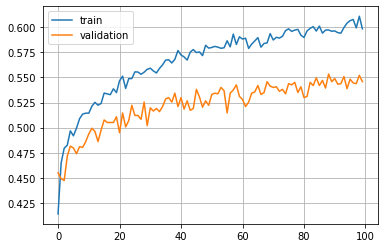

In [34]:
accuracy = history.history['categorical_accuracy']
val_accuracy = history.history['val_categorical_accuracy']
plt.plot(range(len(accuracy)), accuracy, label='train')
plt.plot(range(len(val_accuracy)), val_accuracy, label='validation')
plt.legend()
plt.grid()
plt.show()

The spikes and the the fact that the validation goes under the training accuracy score means that we are clearly overfitting the model

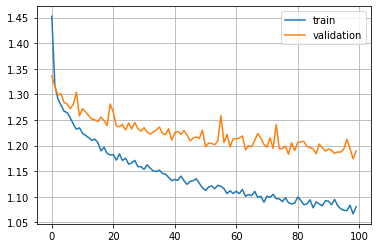

In [35]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(len(accuracy)), loss, label='train')
plt.plot(range(len(val_accuracy)), val_loss, label='validation')
plt.legend()
plt.grid()
plt.show()

This is the same here, the validation loss is clearly higher sooner, and we have many spikes all the long of the values

# Try again using RELU activation layers

In [36]:
normalizer = Normalization()
normalizer.adapt(X)
model2 = Sequential([
    normalizer,
    Dense(64, activation='relu'), # Two additional major benefits of ReLUs are sparsity and a reduced likelihood of vanishing gradient compared to sigmoid
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax', kernel_regularizer=l2(0.01)),  #softmax: 5 classes and we want a proba 
])

In [37]:
model2.compile(
    optimizer=Adam(0.01, amsgrad=True),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

In [38]:
history2 = model2.fit(
    trainX,
    trainy,
    epochs=100,
    #validation_split=0.2,
    validation_data=(testX,testy)
)

Epoch 1/100
197/197 [==============================] - 1s 4ms/step - loss: 1.4939 - categorical_accuracy: 0.4173 - val_loss: 1.3111 - val_categorical_accuracy: 0.4701
Epoch 2/100
197/197 [==============================] - 1s 3ms/step - loss: 1.3178 - categorical_accuracy: 0.4697 - val_loss: 1.2937 - val_categorical_accuracy: 0.4898
Epoch 3/100
197/197 [==============================] - 1s 3ms/step - loss: 1.2928 - categorical_accuracy: 0.4914 - val_loss: 1.2931 - val_categorical_accuracy: 0.4714
Epoch 4/100
197/197 [==============================] - 1s 3ms/step - loss: 1.3150 - categorical_accuracy: 0.4773 - val_loss: 1.3016 - val_categorical_accuracy: 0.4873
Epoch 5/100
197/197 [==============================] - 1s 3ms/step - loss: 1.3055 - categorical_accuracy: 0.4837 - val_loss: 1.2777 - val_categorical_accuracy: 0.4835
Epoch 6/100
197/197 [==============================] - 1s 3ms/step - loss: 1.2682 - categorical_accuracy: 0.4989 - val_loss: 1.2677 - val_categorical_accuracy: 0.489

In [46]:
probs2 = model2.predict(testX)
predicted_labels2 = [np.argmax(p) for p in probs2]

In [63]:
print(list(predicted_labels2))

[4, 4, 4, 4, 3, 4, 2, 4, 4, 4, 4, 3, 0, 4, 0, 4, 0, 4, 3, 4, 1, 4, 0, 4, 4, 4, 0, 4, 0, 0, 2, 0, 4, 1, 3, 4, 4, 0, 3, 4, 2, 3, 2, 4, 0, 0, 4, 0, 4, 2, 4, 0, 0, 2, 0, 0, 0, 4, 3, 4, 0, 0, 4, 4, 4, 4, 4, 2, 2, 0, 2, 4, 4, 0, 0, 0, 4, 2, 0, 0, 4, 2, 4, 4, 0, 2, 4, 2, 0, 4, 4, 3, 2, 0, 2, 0, 0, 0, 2, 4, 4, 1, 4, 0, 4, 0, 0, 0, 2, 0, 4, 2, 4, 0, 4, 0, 4, 3, 0, 4, 0, 4, 3, 4, 0, 4, 4, 0, 0, 4, 0, 0, 4, 0, 2, 0, 0, 4, 0, 4, 3, 4, 4, 0, 2, 4, 2, 0, 2, 4, 4, 0, 0, 3, 2, 4, 4, 0, 0, 4, 4, 4, 4, 0, 0, 2, 0, 4, 4, 0, 4, 0, 0, 0, 2, 4, 2, 0, 0, 0, 4, 4, 0, 4, 4, 4, 0, 0, 4, 0, 0, 4, 0, 0, 3, 2, 2, 4, 0, 4, 0, 2, 0, 4, 2, 2, 0, 0, 4, 0, 4, 0, 4, 0, 4, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0, 0, 0, 3, 4, 4, 4, 0, 4, 1, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 4, 4, 4, 4, 2, 4, 4, 0, 4, 2, 0, 4, 4, 4, 4, 0, 0, 2, 0, 2, 4, 4, 0, 2, 0, 1, 4, 0, 4, 1, 0, 4, 4, 4, 0, 0, 0, 4, 4, 4, 4, 0, 0, 4, 3, 0, 4, 4, 4, 4, 4, 4, 2, 0, 4, 4, 0, 4, 2, 4, 0, 4, 4, 4, 4, 0, 0, 1, 0, 4, 4, 4, 0, 2, 0, 4, 2, 0, 4, 4, 4, 2, 0, 4, 3, 4, 

In [47]:
evaluation2 = model2.evaluate(testX, testy, return_dict=True, verbose=0)
for (metric, val) in evaluation2.items():
    print(f'{metric}: {val}')

loss: 1.1808632612228394
categorical_accuracy: 0.5319361090660095


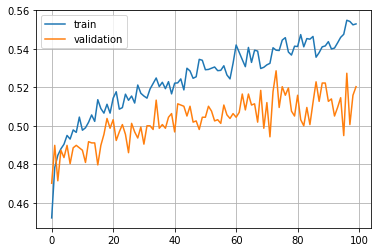

In [49]:
accuracy = history2.history['categorical_accuracy']
val_accuracy = history2.history['val_categorical_accuracy']
plt.plot(range(len(accuracy)), accuracy, label='train')
plt.plot(range(len(val_accuracy)), val_accuracy, label='validation')
plt.legend()
plt.grid()
plt.show()

Like the previous model, we have overfitting, and the same occurs when looking at the loss...

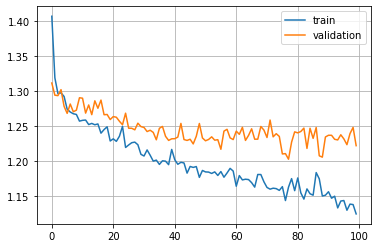

In [42]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
plt.plot(range(len(accuracy)), loss, label='train')
plt.plot(range(len(val_accuracy)), val_loss, label='validation')
plt.legend()
plt.grid()
plt.show()

# Try again with the SGD optimizer

Epoch 1/100
246/246 [==============================] - 1s 3ms/step - loss: 1.6975 - categorical_accuracy: 0.3165 - val_loss: 1.5153 - val_categorical_accuracy: 0.4077
Epoch 2/100
246/246 [==============================] - 1s 3ms/step - loss: 1.5394 - categorical_accuracy: 0.4106 - val_loss: 1.4579 - val_categorical_accuracy: 0.4261
Epoch 3/100
246/246 [==============================] - 1s 3ms/step - loss: 1.4876 - categorical_accuracy: 0.4205 - val_loss: 1.4315 - val_categorical_accuracy: 0.4296
Epoch 4/100
246/246 [==============================] - 1s 3ms/step - loss: 1.4555 - categorical_accuracy: 0.4419 - val_loss: 1.4086 - val_categorical_accuracy: 0.4401
Epoch 5/100
246/246 [==============================] - 1s 3ms/step - loss: 1.4399 - categorical_accuracy: 0.4274 - val_loss: 1.3870 - val_categorical_accuracy: 0.4476
Epoch 6/100
246/246 [==============================] - 1s 3ms/step - loss: 1.4018 - categorical_accuracy: 0.4464 - val_loss: 1.3685 - val_categorical_accuracy: 0.454

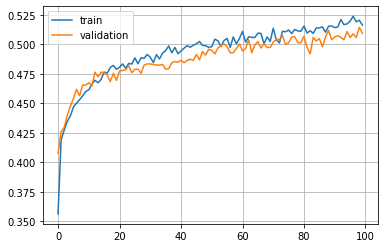

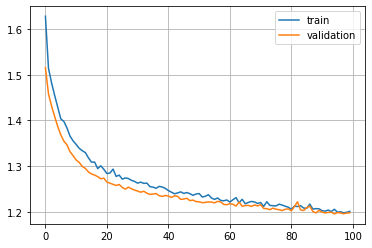

In [66]:
normalizer = Normalization()
normalizer.adapt(X)
model2 = Sequential([
    normalizer,
    Dense(64, activation='relu'), 
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax', kernel_regularizer=l2(0.01)),  #softmax: 5 classes and we want a proba, its generate a float between 0 and 1 for every categ 
])

from keras.optimizers import SGD
lrate=0.01 
model2.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=lrate),metrics=['categorical_accuracy'])
'''
model2.compile(
    optimizer=Adam(0.01, amsgrad=True),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)'''
history2 = model2.fit(
    trainX,
    trainy,
    epochs=100,
    #validation_split=0.2,
    validation_data=(testX,testy)
)
probs2 = model2.predict(testX)
predicted_labels2 = [np.argmax(p) for p in probs2]
print(list(predicted_labels2))

evaluation2 = model2.evaluate(testX, testy, return_dict=True, verbose=0)
for (metric, val) in evaluation2.items():
    print(f'{metric}: {val}')

accuracy = history2.history['categorical_accuracy']
val_accuracy = history2.history['val_categorical_accuracy']
plt.plot(range(len(accuracy)), accuracy, label='train')
plt.plot(range(len(val_accuracy)), val_accuracy, label='validation')
plt.legend()
plt.grid()
plt.show()

loss = history2.history['loss']
val_loss = history2.history['val_loss']
plt.plot(range(len(accuracy)), loss, label='train')
plt.plot(range(len(val_accuracy)), val_loss, label='validation')
plt.legend()
plt.grid()
plt.show()

We clearly have now less overfitting, almost not. The loss is quite low. SGD with this learning rate of 0.01 seems to be working quite well. But we have a poorer accuracy score than the 2 previous models. We will try several tunings now.

Let's try with an increased number of epochs : 200 (since we had a poor overfitting, we can try to increase the number of epochs, hopping we won't overfitt too much)

Epoch 1/200
246/246 [==============================] - 1s 3ms/step - loss: 1.6619 - categorical_accuracy: 0.2890 - val_loss: 1.5235 - val_categorical_accuracy: 0.4132
Epoch 2/200
246/246 [==============================] - 1s 3ms/step - loss: 1.5384 - categorical_accuracy: 0.4071 - val_loss: 1.4753 - val_categorical_accuracy: 0.4182
Epoch 3/200
246/246 [==============================] - 1s 3ms/step - loss: 1.4915 - categorical_accuracy: 0.4195 - val_loss: 1.4411 - val_categorical_accuracy: 0.4271
Epoch 4/200
246/246 [==============================] - 1s 3ms/step - loss: 1.4713 - categorical_accuracy: 0.4193 - val_loss: 1.4155 - val_categorical_accuracy: 0.4346
Epoch 5/200
246/246 [==============================] - 1s 3ms/step - loss: 1.4410 - categorical_accuracy: 0.4355 - val_loss: 1.3946 - val_categorical_accuracy: 0.4436
Epoch 6/200
246/246 [==============================] - 1s 3ms/step - loss: 1.4151 - categorical_accuracy: 0.4520 - val_loss: 1.3749 - val_categorical_accuracy: 0.453

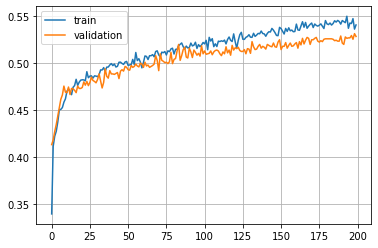

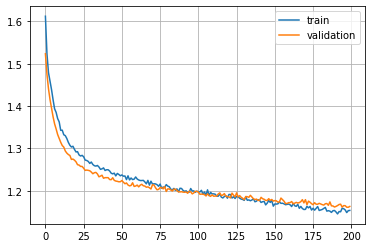

In [67]:
normalizer = Normalization()
normalizer.adapt(X)
model2 = Sequential([
    normalizer,
    Dense(64, activation='relu'), 
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax', kernel_regularizer=l2(0.01)),  #softmax: 5 classes and we want a proba, its generate a float between 0 and 1 for every categ 
])

from keras.optimizers import SGD
lrate=0.01 
model2.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=lrate),metrics=['categorical_accuracy'])
'''
model2.compile(
    optimizer=Adam(0.01, amsgrad=True),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)'''
history2 = model2.fit(
    trainX,
    trainy,
    epochs=200,
    #validation_split=0.2,
    validation_data=(testX,testy)
)
probs2 = model2.predict(testX)
predicted_labels2 = [np.argmax(p) for p in probs2]
print(list(predicted_labels2))

evaluation2 = model2.evaluate(testX, testy, return_dict=True, verbose=0)
for (metric, val) in evaluation2.items():
    print(f'{metric}: {val}')

accuracy = history2.history['categorical_accuracy']
val_accuracy = history2.history['val_categorical_accuracy']
plt.plot(range(len(accuracy)), accuracy, label='train')
plt.plot(range(len(val_accuracy)), val_accuracy, label='validation')
plt.legend()
plt.grid()
plt.show()

loss = history2.history['loss']
val_loss = history2.history['val_loss']
plt.plot(range(len(accuracy)), loss, label='train')
plt.plot(range(len(val_accuracy)), val_loss, label='validation')
plt.legend()
plt.grid()
plt.show()

We begin to have a little bit of overfitting, but overall it works quite well. The loss is following the validation loss which is great too.

Now change l2 at 0.02 and put the drop at 0.2

Epoch 1/200
246/246 [==============================] - 1s 4ms/step - loss: 1.8258 - categorical_accuracy: 0.2932 - val_loss: 1.5973 - val_categorical_accuracy: 0.4197
Epoch 2/200
246/246 [==============================] - 1s 3ms/step - loss: 1.5945 - categorical_accuracy: 0.4177 - val_loss: 1.5163 - val_categorical_accuracy: 0.4266
Epoch 3/200
246/246 [==============================] - 1s 3ms/step - loss: 1.5219 - categorical_accuracy: 0.4288 - val_loss: 1.4661 - val_categorical_accuracy: 0.4381
Epoch 4/200
246/246 [==============================] - 1s 3ms/step - loss: 1.4680 - categorical_accuracy: 0.4512 - val_loss: 1.4293 - val_categorical_accuracy: 0.4426
Epoch 5/200
246/246 [==============================] - 1s 3ms/step - loss: 1.4251 - categorical_accuracy: 0.4520 - val_loss: 1.4008 - val_categorical_accuracy: 0.4596
Epoch 6/200
246/246 [==============================] - 1s 3ms/step - loss: 1.4261 - categorical_accuracy: 0.4452 - val_loss: 1.3778 - val_categorical_accuracy: 0.456

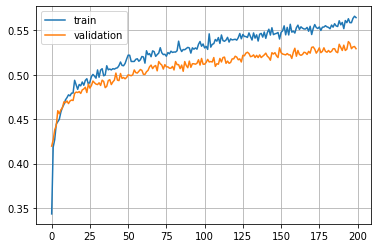

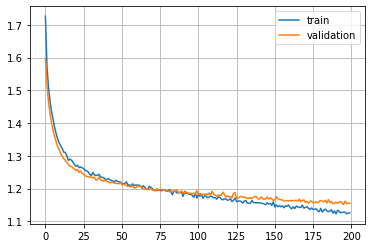

In [68]:
normalizer = Normalization()
normalizer.adapt(X)
model2 = Sequential([
    normalizer,
    Dense(64, activation='relu'), 
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax', kernel_regularizer=l2(0.02)),  #softmax: 5 classes and we want a proba, its generate a float between 0 and 1 for every categ 
])

from keras.optimizers import SGD
lrate=0.01 
model2.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=lrate),metrics=['categorical_accuracy'])
'''
model2.compile(
    optimizer=Adam(0.01, amsgrad=True),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)'''
history2 = model2.fit(
    trainX,
    trainy,
    epochs=200,
    #validation_split=0.2,
    validation_data=(testX,testy)
)
probs2 = model2.predict(testX)
predicted_labels2 = [np.argmax(p) for p in probs2]
print(list(predicted_labels2))

evaluation2 = model2.evaluate(testX, testy, return_dict=True, verbose=0)
for (metric, val) in evaluation2.items():
    print(f'{metric}: {val}')

accuracy = history2.history['categorical_accuracy']
val_accuracy = history2.history['val_categorical_accuracy']
plt.plot(range(len(accuracy)), accuracy, label='train')
plt.plot(range(len(val_accuracy)), val_accuracy, label='validation')
plt.legend()
plt.grid()
plt.show()

loss = history2.history['loss']
val_loss = history2.history['val_loss']
plt.plot(range(len(accuracy)), loss, label='train')
plt.plot(range(len(val_accuracy)), val_loss, label='validation')
plt.legend()
plt.grid()
plt.show()

Changing the drop and l2 didnt imprive the overfitting nor the accuracy

Let's try to introduce the batch size parameter : The batch size defines the number of samples that will be propagated through the network.

The batch size can help reducing the overfitting.

We also delete one layer

Epoch 1/200
16/16 [==============================] - 1s 14ms/step - loss: 1.7958 - categorical_accuracy: 0.2845 - val_loss: 1.7403 - val_categorical_accuracy: 0.3458
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 1.7612 - categorical_accuracy: 0.3266 - val_loss: 1.7069 - val_categorical_accuracy: 0.3698
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 1.7119 - categorical_accuracy: 0.3640 - val_loss: 1.6827 - val_categorical_accuracy: 0.3897
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 1.6997 - categorical_accuracy: 0.3780 - val_loss: 1.6638 - val_categorical_accuracy: 0.4002
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 1.6724 - categorical_accuracy: 0.3977 - val_loss: 1.6476 - val_categorical_accuracy: 0.4122
Epoch 6/200
16/16 [==============================] - 0s 4ms/step - loss: 1.6571 - categorical_accuracy: 0.3938 - val_loss: 1.6339 - val_categorical_accuracy: 0.4147
Epoch 7/2

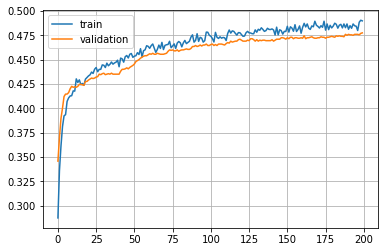

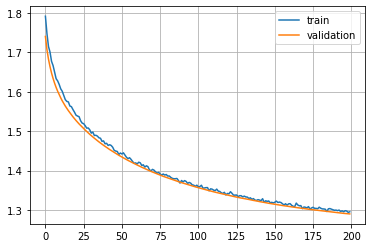

In [83]:
normalizer = Normalization()
normalizer.adapt(X)
model2 = Sequential([
    normalizer,
    Dense(64, activation='relu'), 
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax', kernel_regularizer=l2(0.02)),  #softmax: 5 classes and we want a proba, its generate a float between 0 and 1 for every categ 
])

from keras.optimizers import SGD
lrate=0.01 
model2.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=lrate),metrics=['categorical_accuracy'])
'''
model2.compile(
    optimizer=Adam(0.01, amsgrad=True),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)'''
history2 = model2.fit(
    trainX,
    trainy,
    epochs=200,
    batch_size=512, #The batch size defines the number of samples that will be propagated through the network.
    validation_data=(testX,testy)
)
probs2 = model2.predict(testX)
predicted_labels2 = [np.argmax(p) for p in probs2]
print(list(predicted_labels2))

evaluation2 = model2.evaluate(testX, testy, return_dict=True, verbose=0)
for (metric, val) in evaluation2.items():
    print(f'{metric}: {val}')

accuracy = history2.history['categorical_accuracy']
val_accuracy = history2.history['val_categorical_accuracy']
plt.plot(range(len(accuracy)), accuracy, label='train')
plt.plot(range(len(val_accuracy)), val_accuracy, label='validation')
plt.legend()
plt.grid()
plt.show()

loss = history2.history['loss']
val_loss = history2.history['val_loss']
plt.plot(range(len(accuracy)), loss, label='train')
plt.plot(range(len(val_accuracy)), val_loss, label='validation')
plt.legend()
plt.grid()
plt.show()

The batch size seems to improve the overfitting but the accuracy is worse. The loss follows really well the validation.

# Let's try the same model but using the rmsprop optimizer.

With RMSprop : The RMSprop optimizer is similar to the gradient descent algorithm with momentum. The RMSprop optimizer restricts the oscillations in the vertical direction. Therefore, we can increase our learning rate and our algorithm could take larger steps in the horizontal direction converging faster. The difference between RMSprop and gradient descent is on how the gradients are calculated.

Epoch 1/200
16/16 [==============================] - 1s 16ms/step - loss: 1.7661 - categorical_accuracy: 0.3336 - val_loss: 1.5825 - val_categorical_accuracy: 0.4311
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 1.5696 - categorical_accuracy: 0.4299 - val_loss: 1.5059 - val_categorical_accuracy: 0.4441
Epoch 3/200
16/16 [==============================] - 0s 6ms/step - loss: 1.5006 - categorical_accuracy: 0.4520 - val_loss: 1.4592 - val_categorical_accuracy: 0.4496
Epoch 4/200
16/16 [==============================] - 0s 6ms/step - loss: 1.4589 - categorical_accuracy: 0.4636 - val_loss: 1.4226 - val_categorical_accuracy: 0.4696
Epoch 5/200
16/16 [==============================] - 0s 6ms/step - loss: 1.4225 - categorical_accuracy: 0.4688 - val_loss: 1.3933 - val_categorical_accuracy: 0.4711
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 1.3915 - categorical_accuracy: 0.4800 - val_loss: 1.3685 - val_categorical_accuracy: 0.4785
Epoch 7/2

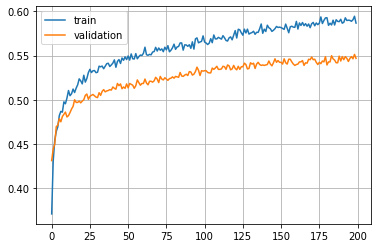

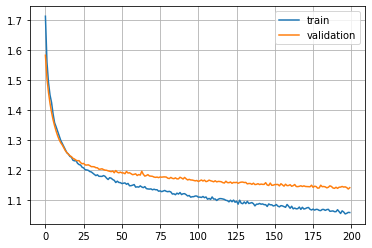

In [85]:
normalizer = Normalization()
normalizer.adapt(X)
model2 = Sequential([
    normalizer,
    Dense(64, activation='relu'), 
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax', kernel_regularizer=l2(0.02)),  #softmax: 5 classes and we want a proba, its generate a float between 0 and 1 for every categ 
])

model2.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['categorical_accuracy'])
'''
model2.compile(
    optimizer=Adam(0.01, amsgrad=True),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)'''
history2 = model2.fit(
    trainX,
    trainy,
    epochs=200,
    batch_size=512, #The batch size defines the number of samples that will be propagated through the network.
    validation_data=(testX,testy)
)
probs2 = model2.predict(testX)
predicted_labels2 = [np.argmax(p) for p in probs2]
print(list(predicted_labels2))

evaluation2 = model2.evaluate(testX, testy, return_dict=True, verbose=0)
for (metric, val) in evaluation2.items():
    print(f'{metric}: {val}')

accuracy = history2.history['categorical_accuracy']
val_accuracy = history2.history['val_categorical_accuracy']
plt.plot(range(len(accuracy)), accuracy, label='train')
plt.plot(range(len(val_accuracy)), val_accuracy, label='validation')
plt.legend()
plt.grid()
plt.show()

loss = history2.history['loss']
val_loss = history2.history['val_loss']
plt.plot(range(len(accuracy)), loss, label='train')
plt.plot(range(len(val_accuracy)), val_loss, label='validation')
plt.legend()
plt.grid()
plt.show()

The accuracy is way better than the previous models but as we can see the validation curve is clearly lower than the training accuracy which means that the model is yet again overfitting.

We will try to decrease the batch size

Epoch 1/200
40/40 [==============================] - 1s 7ms/step - loss: 1.7446 - categorical_accuracy: 0.3405 - val_loss: 1.5120 - val_categorical_accuracy: 0.4386
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 1.4989 - categorical_accuracy: 0.4568 - val_loss: 1.4265 - val_categorical_accuracy: 0.4656
Epoch 3/200
40/40 [==============================] - 0s 4ms/step - loss: 1.4336 - categorical_accuracy: 0.4645 - val_loss: 1.3673 - val_categorical_accuracy: 0.4736
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 1.3792 - categorical_accuracy: 0.4811 - val_loss: 1.3342 - val_categorical_accuracy: 0.4820
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 1.3402 - categorical_accuracy: 0.4843 - val_loss: 1.3071 - val_categorical_accuracy: 0.4895
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 1.3141 - categorical_accuracy: 0.4927 - val_loss: 1.2821 - val_categorical_accuracy: 0.4910
Epoch 7/20

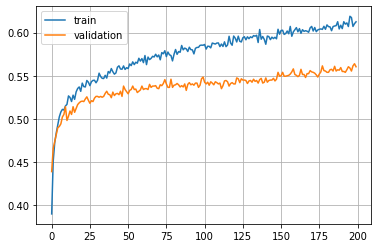

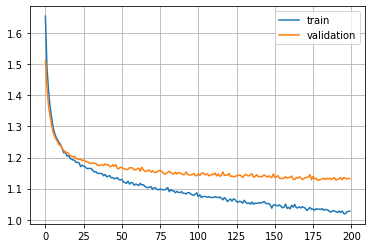

In [86]:
normalizer = Normalization()
normalizer.adapt(X)
model2 = Sequential([
    normalizer,
    Dense(64, activation='relu'), 
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax', kernel_regularizer=l2(0.02)),  #softmax: 5 classes and we want a proba, its generate a float between 0 and 1 for every categ 
])


model2.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['categorical_accuracy'])
'''
model2.compile(
    optimizer=Adam(0.01, amsgrad=True),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)'''
history2 = model2.fit(
    trainX,
    trainy,
    epochs=200,
    batch_size=200, #The batch size defines the number of samples that will be propagated through the network.
    validation_data=(testX,testy)
)
probs2 = model2.predict(testX)
predicted_labels2 = [np.argmax(p) for p in probs2]
print(list(predicted_labels2))

evaluation2 = model2.evaluate(testX, testy, return_dict=True, verbose=0)
for (metric, val) in evaluation2.items():
    print(f'{metric}: {val}')

accuracy = history2.history['categorical_accuracy']
val_accuracy = history2.history['val_categorical_accuracy']
plt.plot(range(len(accuracy)), accuracy, label='train')
plt.plot(range(len(val_accuracy)), val_accuracy, label='validation')
plt.legend()
plt.grid()
plt.show()

loss = history2.history['loss']
val_loss = history2.history['val_loss']
plt.plot(range(len(accuracy)), loss, label='train')
plt.plot(range(len(val_accuracy)), val_loss, label='validation')
plt.legend()
plt.grid()
plt.show()

Better accuracy but overfitting stronger

What happens if we add another layer like the 2 others :

Epoch 1/200
40/40 [==============================] - 1s 8ms/step - loss: 1.7853 - categorical_accuracy: 0.3020 - val_loss: 1.5161 - val_categorical_accuracy: 0.4471
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 1.5182 - categorical_accuracy: 0.4456 - val_loss: 1.4265 - val_categorical_accuracy: 0.4566
Epoch 3/200
40/40 [==============================] - 0s 5ms/step - loss: 1.4217 - categorical_accuracy: 0.4743 - val_loss: 1.3646 - val_categorical_accuracy: 0.4616
Epoch 4/200
40/40 [==============================] - 0s 5ms/step - loss: 1.3621 - categorical_accuracy: 0.4825 - val_loss: 1.3276 - val_categorical_accuracy: 0.4775
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 1.3417 - categorical_accuracy: 0.4926 - val_loss: 1.3003 - val_categorical_accuracy: 0.4835
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 1.3223 - categorical_accuracy: 0.4895 - val_loss: 1.2750 - val_categorical_accuracy: 0.4900
Epoch 7/20

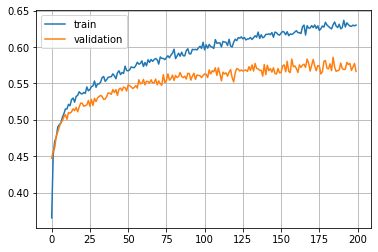

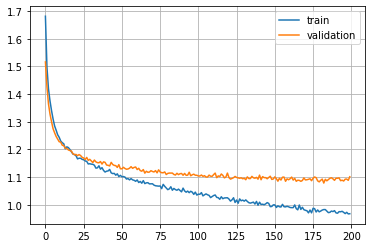

In [87]:
normalizer = Normalization()
normalizer.adapt(X)
model2 = Sequential([
    normalizer,
    Dense(64, activation='relu'), 
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax', kernel_regularizer=l2(0.02)),  #softmax: 5 classes and we want a proba, its generate a float between 0 and 1 for every categ 
])


model2.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['categorical_accuracy'])
'''
model2.compile(
    optimizer=Adam(0.01, amsgrad=True),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)'''
history2 = model2.fit(
    trainX,
    trainy,
    epochs=200,
    batch_size=200, #The batch size defines the number of samples that will be propagated through the network.
    validation_data=(testX,testy)
)
probs2 = model2.predict(testX)
predicted_labels2 = [np.argmax(p) for p in probs2]
print(list(predicted_labels2))

evaluation2 = model2.evaluate(testX, testy, return_dict=True, verbose=0)
for (metric, val) in evaluation2.items():
    print(f'{metric}: {val}')

accuracy = history2.history['categorical_accuracy']
val_accuracy = history2.history['val_categorical_accuracy']
plt.plot(range(len(accuracy)), accuracy, label='train')
plt.plot(range(len(val_accuracy)), val_accuracy, label='validation')
plt.legend()
plt.grid()
plt.show()

loss = history2.history['loss']
val_loss = history2.history['val_loss']
plt.plot(range(len(accuracy)), loss, label='train')
plt.plot(range(len(val_accuracy)), val_loss, label='validation')
plt.legend()
plt.grid()
plt.show()

Always the same problem.

Epoch 1/200
16/16 [==============================] - 1s 14ms/step - loss: 1.6717 - categorical_accuracy: 0.3597 - val_loss: 1.3976 - val_categorical_accuracy: 0.4755
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 1.4111 - categorical_accuracy: 0.4580 - val_loss: 1.3039 - val_categorical_accuracy: 0.4775
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 1.3398 - categorical_accuracy: 0.4793 - val_loss: 1.2585 - val_categorical_accuracy: 0.4840
Epoch 4/200
16/16 [==============================] - 0s 5ms/step - loss: 1.2795 - categorical_accuracy: 0.4945 - val_loss: 1.2522 - val_categorical_accuracy: 0.5040
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 1.2567 - categorical_accuracy: 0.4985 - val_loss: 1.2455 - val_categorical_accuracy: 0.4990
Epoch 6/200
16/16 [==============================] - 0s 6ms/step - loss: 1.2545 - categorical_accuracy: 0.4950 - val_loss: 1.2311 - val_categorical_accuracy: 0.4935
Epoch 7/2

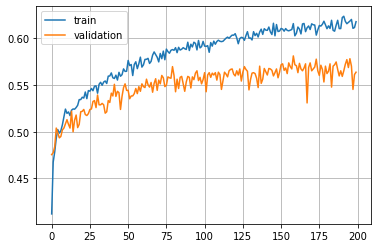

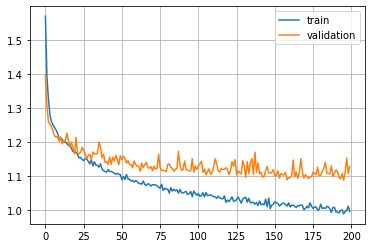

In [91]:
normalizer = Normalization()
normalizer.adapt(X)
model2 = Sequential([
    normalizer,
    Dense(64, activation='relu'), 
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax', kernel_regularizer=l2(0.02)),  #softmax: 5 classes and we want a proba, its generate a float between 0 and 1 for every categ 
])

opt = keras.optimizers.RMSprop(learning_rate=0.005)
model2.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['categorical_accuracy'])
'''
model2.compile(
    optimizer=Adam(0.01, amsgrad=True),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)'''
history2 = model2.fit(
    trainX,
    trainy,
    epochs=200,
    batch_size=512, #The batch size defines the number of samples that will be propagated through the network.
    validation_data=(testX,testy)
)
probs2 = model2.predict(testX)
predicted_labels2 = [np.argmax(p) for p in probs2]
print(list(predicted_labels2))

evaluation2 = model2.evaluate(testX, testy, return_dict=True, verbose=0)
for (metric, val) in evaluation2.items():
    print(f'{metric}: {val}')

accuracy = history2.history['categorical_accuracy']
val_accuracy = history2.history['val_categorical_accuracy']
plt.plot(range(len(accuracy)), accuracy, label='train')
plt.plot(range(len(val_accuracy)), val_accuracy, label='validation')
plt.legend()
plt.grid()
plt.show()

loss = history2.history['loss']
val_loss = history2.history['val_loss']
plt.plot(range(len(accuracy)), loss, label='train')
plt.plot(range(len(val_accuracy)), val_loss, label='validation')
plt.legend()
plt.grid()
plt.show()

# Lets try to tune (no time to run it)

## First the l_rate

In [77]:
def fit_model(trainX,trainy,testX,testy,l_rate):
    normalizer = Normalization()
    normalizer.adapt(X)
    model2 = Sequential([
    normalizer,
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax', kernel_regularizer=l2(0.01)),  #softmax: 5 classes and we want a proba 
    ])
    #print(model.summary())
    lrate=l_rate
    model2.compile(
    optimizer=RMSprop(l_rate), # 
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
    )
    history2 = model2.fit(
    trainX,
    trainy,
    epochs=150,
    validation_data=(testX,testy), verbose=0
    )
    
    accuracy = history2.history['categorical_accuracy']
    val_accuracy = history2.history['val_categorical_accuracy']
    plt.plot(range(len(accuracy)), accuracy, label='train')
    plt.plot(range(len(val_accuracy)), val_accuracy, label='validation')
    plt.legend()

    loss = history2.history['loss']
    val_loss = history2.history['val_loss']
    plt.plot(range(len(accuracy)), loss, label='train')
    plt.plot(range(len(val_accuracy)), val_loss, label='validation')
    plt.legend()

KeyboardInterrupt: ignored

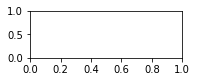

In [79]:
l_rates=[1e-0,1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7]
for i in range(len(l_rates)):
    plot_n=420 + (i+1)
    plt.subplot(plot_n)
    fit_model(trainX,trainy,testX,testy,l_rates[i])
    plt.show()